#**Electric-Vehicle Data Analysis**




In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive


In [2]:
# Authenticate and create PyDrive client
gauth = GoogleAuth()
drive = GoogleDrive(gauth)

In [3]:
file_url = "https://drive.google.com/file/d/1kOVQ6Pi1MXnpxtVcau4ffTGKM_PzhuBF/view?usp=sharing"
file_id = file_url.split("/d/")[1].split("/view")[0]
download_url = "https://drive.google.com/uc?id=" + file_id

In [6]:
data = pd.read_csv(download_url)



```
# This is formatted as code
```

#Basic Data Exploration





In [7]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,5YJ3E1EA7K,San Diego,San Diego,CA,92101.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,266614659,POINT (-117.16171 32.71568),NaN,6.073005e+09
2,7JRBR0FL9M,Lane,Eugene,OR,97404.0,2021,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,NaN,144502018,POINT (-123.12802 44.09573),NaN,4.103900e+10
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10


In [8]:
def missing_col(df):
    missing_values = df.isnull().sum()
    missing_values = missing_values.sort_values(ascending = False)
    return missing_values
missing_columns = missing_col(data)
print(missing_columns)

Electric Utility                                     473
Legislative District                                 297
Model                                                181
Vehicle Location                                      29
2020 Census Tract                                      2
City                                                   2
Postal Code                                            2
County                                                 2
Base MSRP                                              0
DOL Vehicle ID                                         0
VIN (1-10)                                             0
Electric Range                                         0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Make                                                   0
Model Year                                             0
State                                                  0
Electric Vehicle Type                                  0
dtype: int64


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124716 entries, 0 to 124715
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         124716 non-null  object 
 1   County                                             124714 non-null  object 
 2   City                                               124714 non-null  object 
 3   State                                              124716 non-null  object 
 4   Postal Code                                        124714 non-null  float64
 5   Model Year                                         124716 non-null  int64  
 6   Make                                               124716 non-null  object 
 7   Model                                              124535 non-null  object 
 8   Electric Vehicle Type                              124716 non-null  object

In [10]:
data.shape

(124716, 17)

## Data Visualisation

In [11]:
# import visualisation libraries seaborn & pyplot
import matplotlib.pyplot as plt
import seaborn as sns

# **1: Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs)**

<ipython-input-12-61014215c0b5>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  battery = data.loc[data['Electric Vehicle Type'] == types[0]].count()[0]
<ipython-input-12-61014215c0b5>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hybrid = data.loc[data['Electric Vehicle Type'] == types[1]].count()[0]


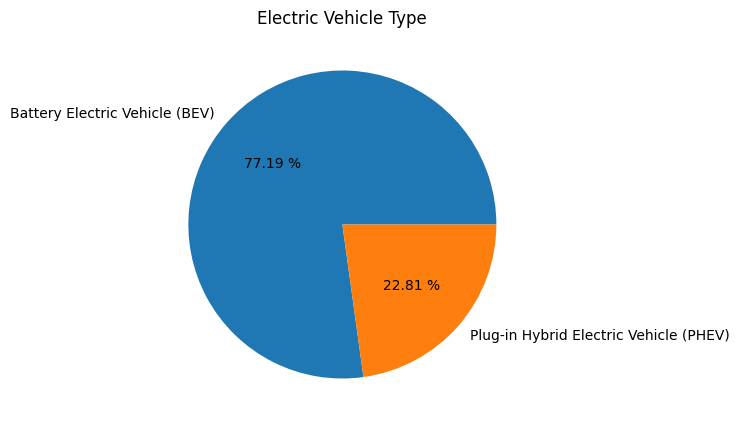

In [12]:
types = ['Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)']

# Portion of male/female
plt.figure(figsize = (10,5), dpi = 100)

battery = data.loc[data['Electric Vehicle Type'] == types[0]].count()[0]
hybrid = data.loc[data['Electric Vehicle Type'] == types[1]].count()[0]

plt.pie([battery, hybrid], labels = types, autopct = '%.2f %%')
plt.title('Electric Vehicle Type')

plt.show()

# **2 : Electric Range by Electric Vehicle Type**

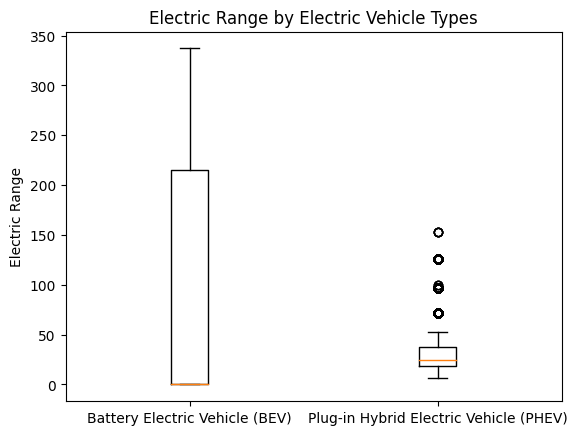

In [13]:
# Boxplot of distribution
plt.style.use('default')

battery_range = data.loc[data['Electric Vehicle Type'] == types[0]]['Electric Range']
hybrid_range = data.loc[data['Electric Vehicle Type'] == types[1]]['Electric Range']

plt.boxplot([battery_range,hybrid_range],labels = types)

plt.title('Electric Range by Electric Vehicle Types')
plt.ylabel('Electric Range')
plt.show()


<ipython-input-14-ee2fb152b3e7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(battery_range)


Text(0.5, 1.0, 'Battery Electric Vehicle (BEV)Electric Range')

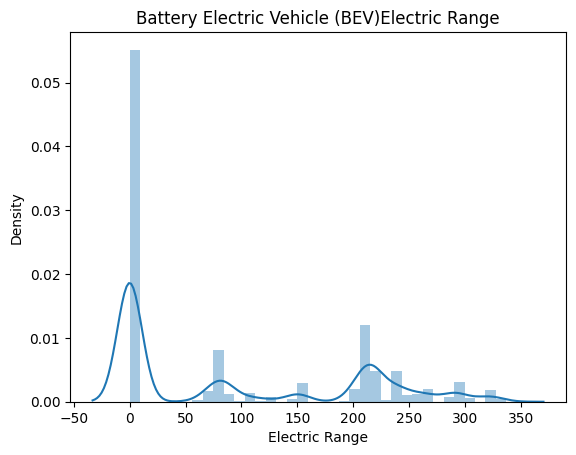

In [14]:
# Histogram of Electric Range by Types
#plt.hist(battery_range)
sns.distplot(battery_range)
plt.xlabel('Electric Range')
plt.title(types[0] + 'Electric Range')

Text(0.5, 1.0, 'Plug-in Hybrid Electric Vehicle (PHEV)Electric Range')

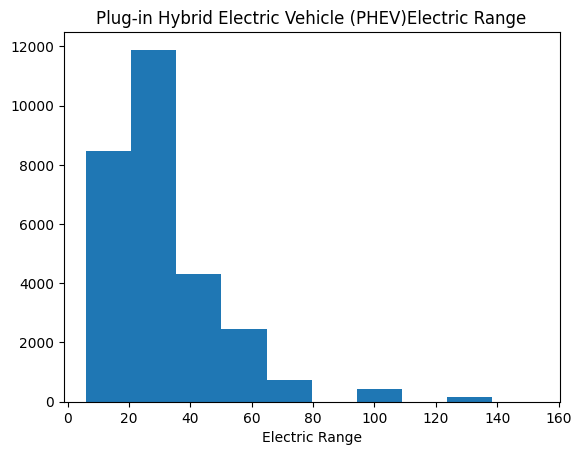

In [15]:
## Histogram of Electric Range by Types
plt.hist(hybrid_range)
plt.xlabel('Electric Range')
plt.title(types[1] + 'Electric Range')

# **3:What are the top 10 popular car brand**

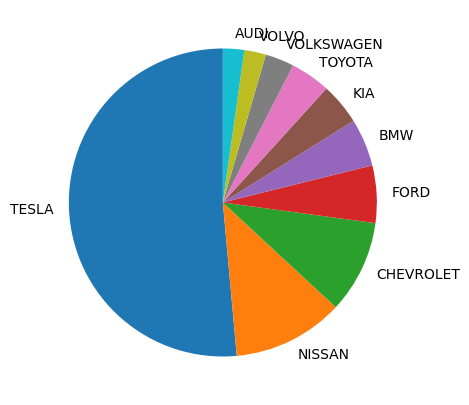

In [16]:
# market share by make
top = 10
plt.figure(figsize = (10,5), dpi = 100)

make_count = data.groupby(['Make']).count().reset_index()
make_count['Values'] = make_count['City']
make_count = make_count.sort_values(by = ['Values'], ascending= False)

# Plot top 10 company
make_count = make_count.iloc[:top,]


plt.pie(make_count['Values'],labels= make_count['Make'], startangle=90)
plt.show()

# **4: Top 10 Cities**

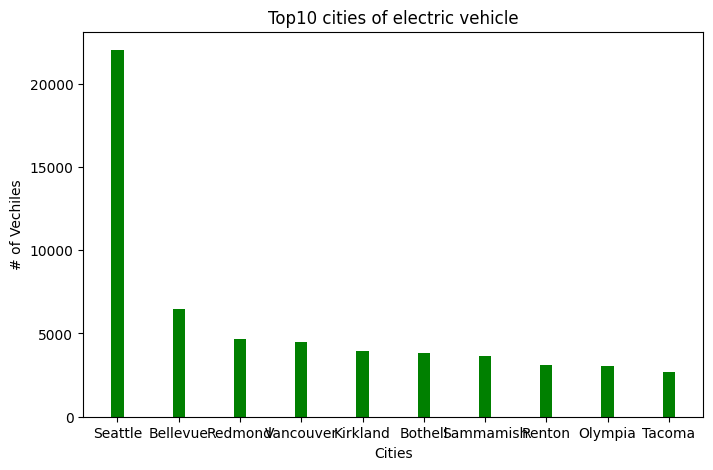

In [17]:
city_count = data.groupby(['City']).count().reset_index().sort_values(by = ['Electric Utility'], ascending= False)

# Find out top 10 cities for electric population
city_count = city_count.iloc[:top,]
cities = city_count['City'].unique()
values = city_count['Electric Utility']

plt.figure(figsize = (8,5))
plt.bar(cities,values,color = 'g',width = 0.2)

plt.xlabel('Cities')
plt.ylabel('# of Vechiles')
plt.title('Top' + str(top) +  ' cities of electric vehicle')

plt.show()

#**5: Electric car trend by brand**

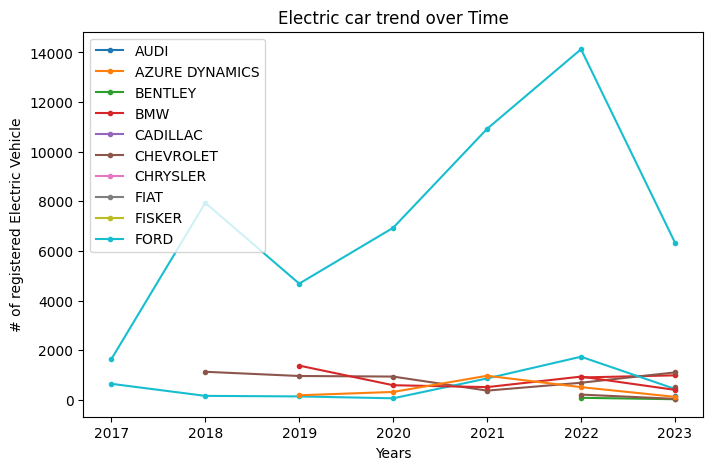

In [18]:
year_register = data.groupby(['Make','Model Year']).count().reset_index()
makes = year_register['Make'].unique()

plt.figure(figsize = (8,5))
plt.title('Electric car trend over Time')

for make in makes:
    make_register = year_register[year_register['Make'] == make]
    plt.plot(make_register['Model Year'][8:],make_register['Electric Utility'][8:], marker ='.')



plt.xlabel('Years')
plt.ylabel('# of registered Electric Vehicle')
plt.legend(makes[:top])

plt.show()